# 7. Job scheduling

For the mean delay with the bimodal distribution, we would need to divide all results by five because the calculations are made with a mean job size of five.

## Import packages and define the plot function

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# uncomment this line if you prefer dynamic matplotlib plots
# %matplotlib notebook

# change the default figure size
pylab.rcParams['figure.figsize'] = (10.0, 6.0)
pylab.rcParams['legend.fontsize'] = 12

markers = ['x', '+', '*']

In [3]:
# manipulate dataframes
import pandas as pd

In [4]:
# folder where the output of compute.sh is stored
folder = 'data/'

## Toy example

In [5]:
def toy_example(scenario, distribution, metric, timers=[0, 1, 5]):
    for i in range(2):
        figure()
        
        for j, timer in enumerate(timers):
            # read the simulation results
            result = pd.read_csv('%s%s-%s-%d-%s.csv'
                                 % (folder, scenario, distribution, timer, metric))
            
            # plot the simulation results
            plot(result['rho'], result['performance%d' % i],
                 label='m = %d' % timer, marker=markers[0], color='C%d' % j, linestyle='None')
            fill_between(result['rho'],
                         (result['performance%d' % i] - result['interval%d' % i]),
                         (result['performance%d' % i] + result['interval%d' % i]),
                         color='C%d' % j, alpha=.3)

        title('Pool %d (%s - %s - %s)' % (i+1, scenario, distribution, metric))
        xlim(0, 1); ylim(ymin=0)
        legend(loc='best')
        show()

### Three servers (the M model)

#### Bimodal number of exponentially-distributed phases

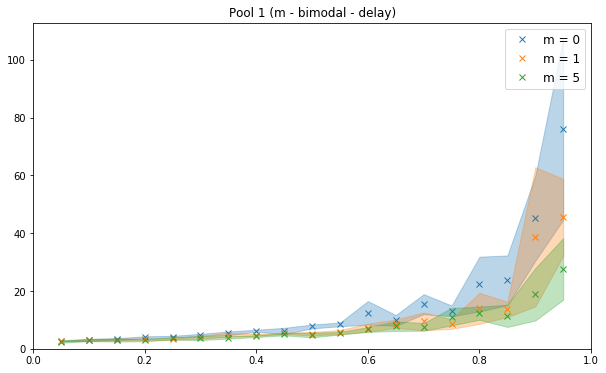

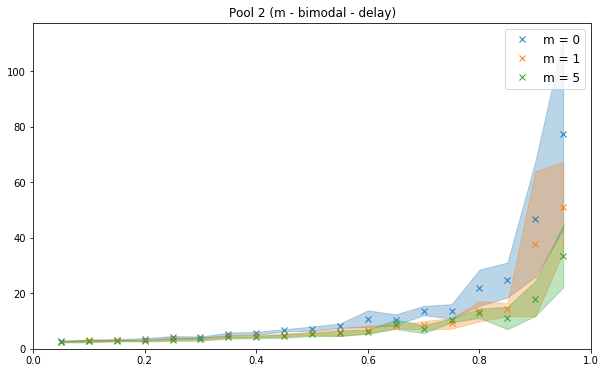

In [6]:
toy_example('m', 'bimodal', 'delay')

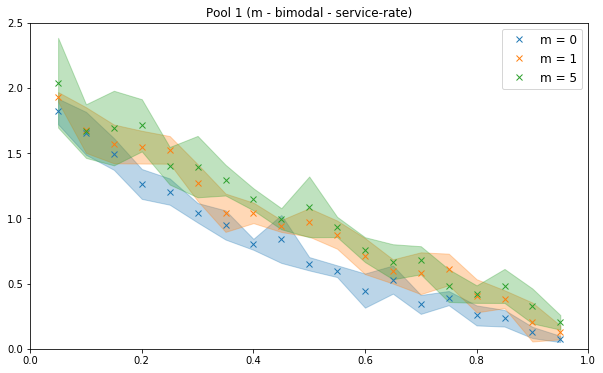

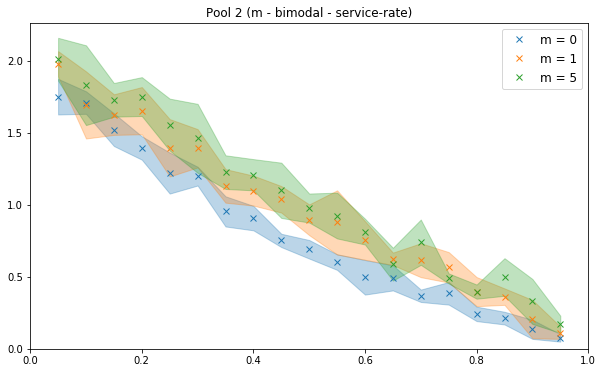

In [7]:
toy_example('m', 'bimodal', 'service-rate')

#### Hyperexponential

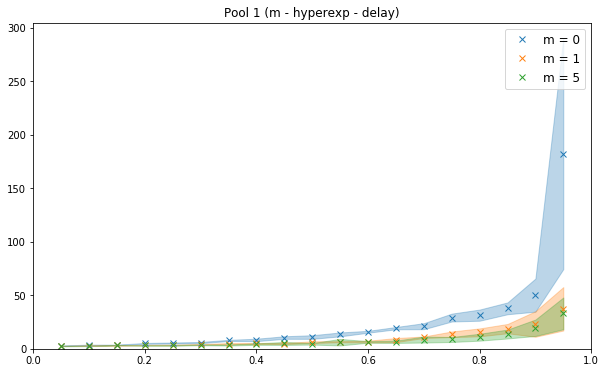

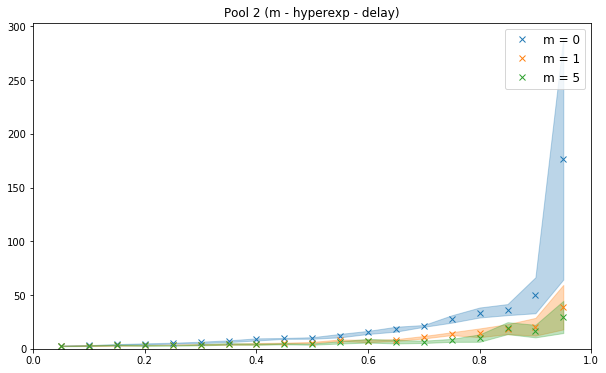

In [8]:
toy_example('m', 'hyperexp', 'delay')

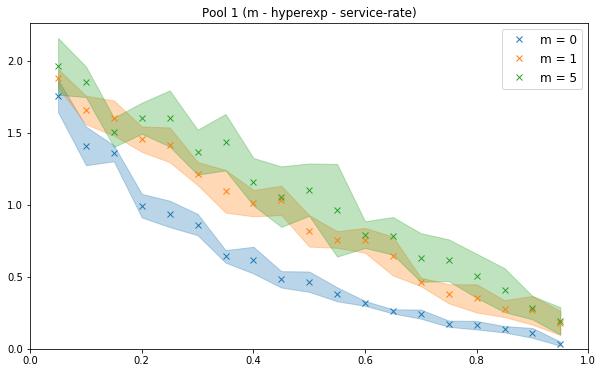

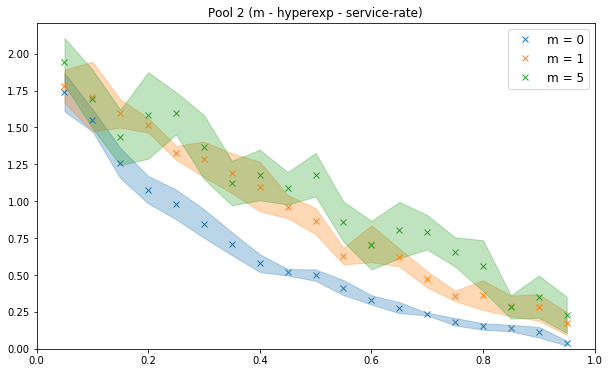

In [9]:
toy_example('m', 'hyperexp', 'service-rate')

#### Zipf number of exponentially-distributed phases

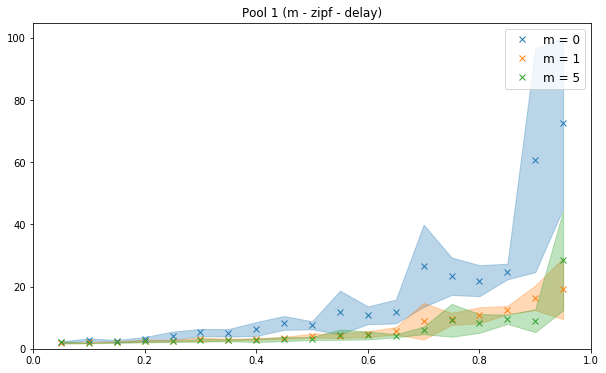

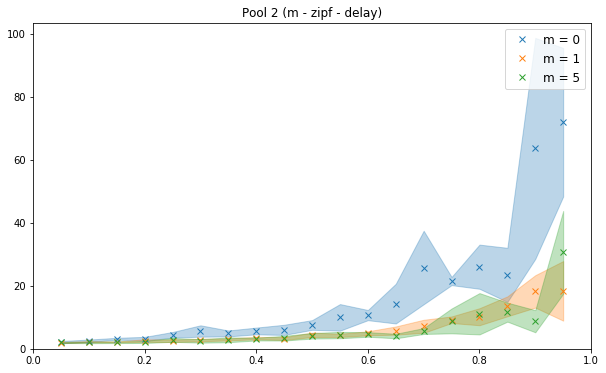

In [10]:
toy_example('m', 'zipf', 'delay')

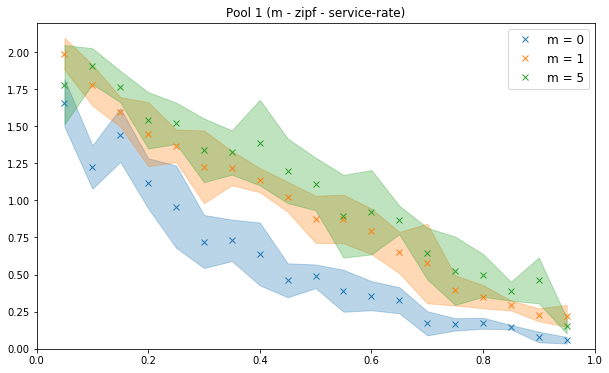

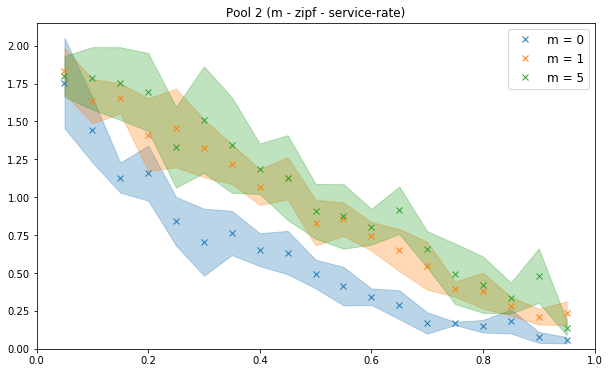

In [11]:
toy_example('m', 'zipf', 'service-rate')

### Two servers (the N model)

#### Bimodal number of exponentially-distributed phases

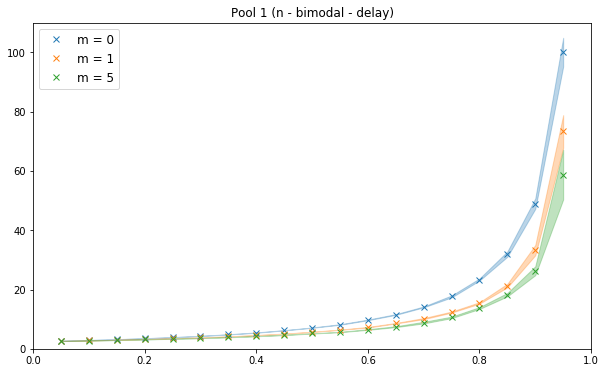

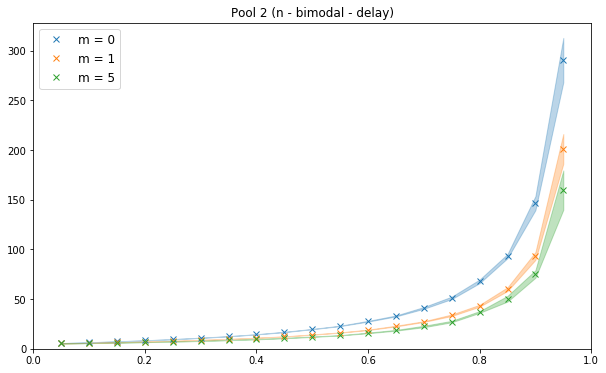

In [12]:
toy_example('n', 'bimodal', 'delay')

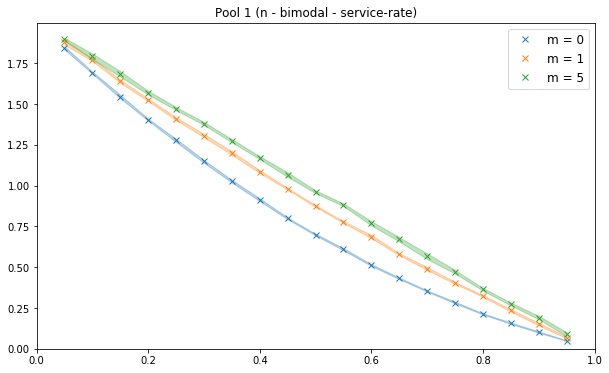

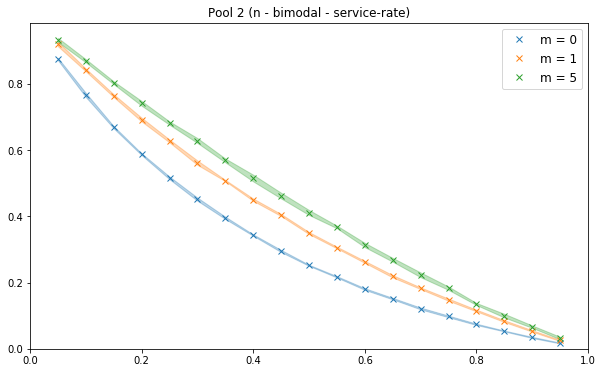

In [13]:
toy_example('n', 'bimodal', 'service-rate')

#### Hyperexponential

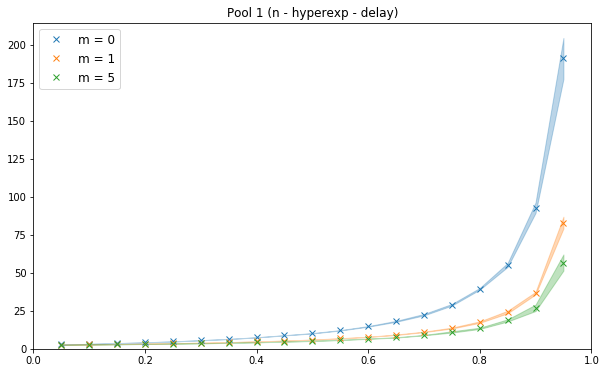

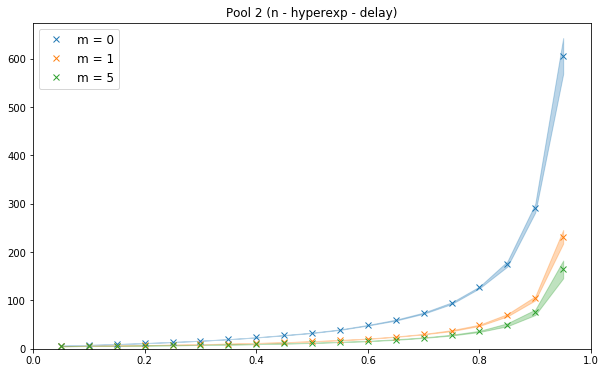

In [14]:
toy_example('n', 'hyperexp', 'delay')

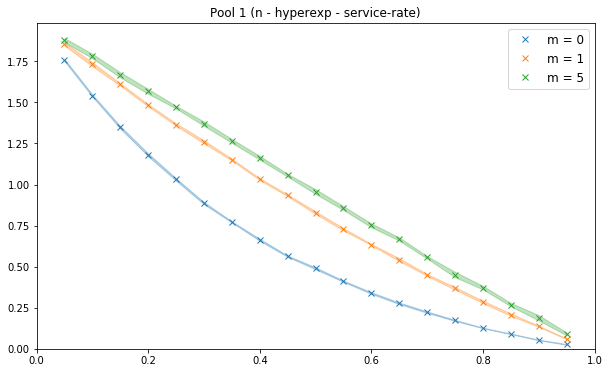

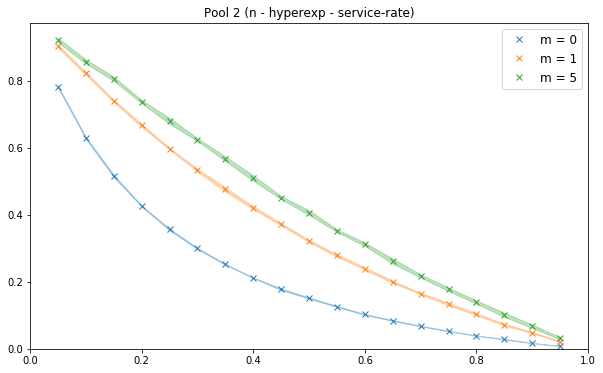

In [15]:
toy_example('n', 'hyperexp', 'service-rate')

#### Zipf number of exponentially-distributed phases

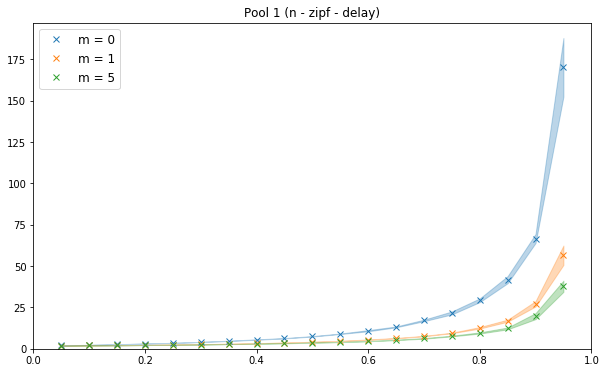

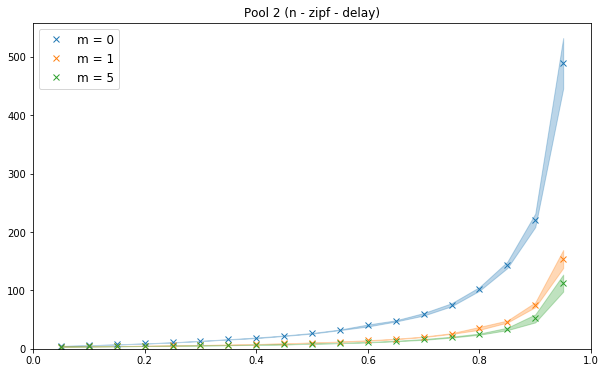

In [16]:
toy_example('n', 'zipf', 'delay')

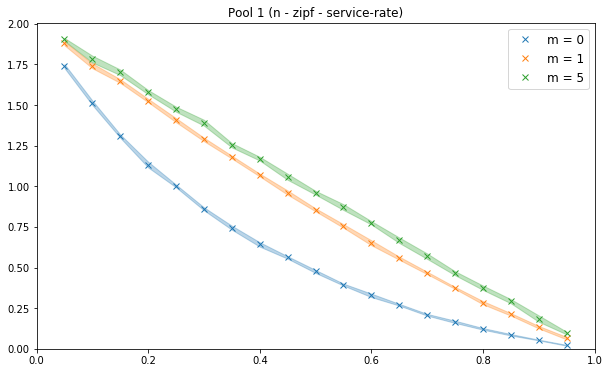

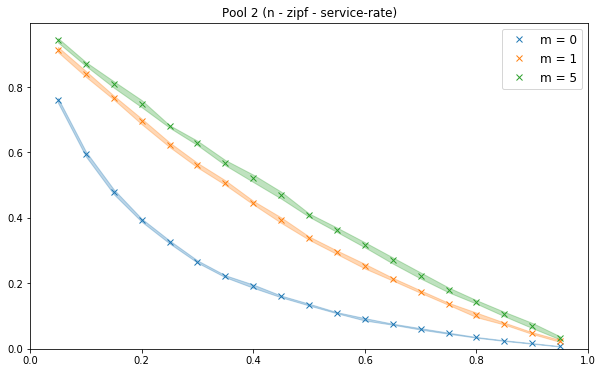

In [17]:
toy_example('n', 'zipf', 'service-rate')

## Large system with a random job assignment

In [18]:
def random(scenario, distribution, metric, timers=[0, 1, 5]):
    figure()

    for j, timer in enumerate(timers):
        # read the simulation results
        result = pd.read_csv('%s%s-%s-%d-%s.csv'
                             % (folder, scenario, distribution, timer, metric))

        # plot the simulation results
        plot(result['rho'], result['performance'],
             label='m = %d' % timer, marker=markers[0], color='C%d' % j, linestyle='None')
        fill_between(result['rho'],
                     (result['performance'] - result['interval']),
                     (result['performance'] + result['interval']),
                     color='C%d' % j, alpha=.3)

    title('Average over all pools (%s - %s - %s)' % (scenario, distribution, metric))
    xlim(0, 1); ylim(ymin=0)
    legend(loc='best')
    show()

### Degree two

#### Bimodal number of exponentially-distributed phases

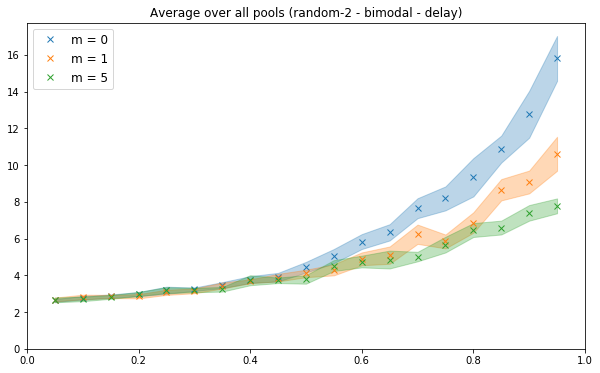

In [19]:
random('random-2', 'bimodal', 'delay')

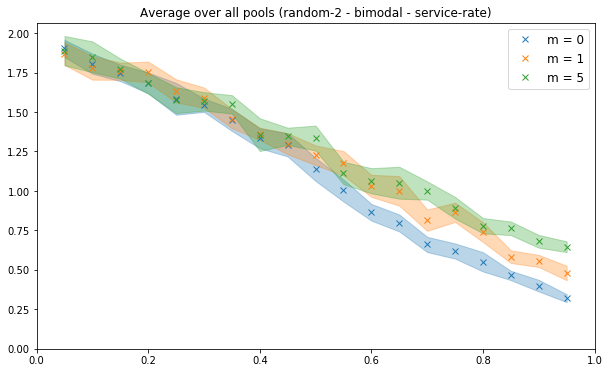

In [20]:
random('random-2', 'bimodal', 'service-rate')

#### Hyperexponential

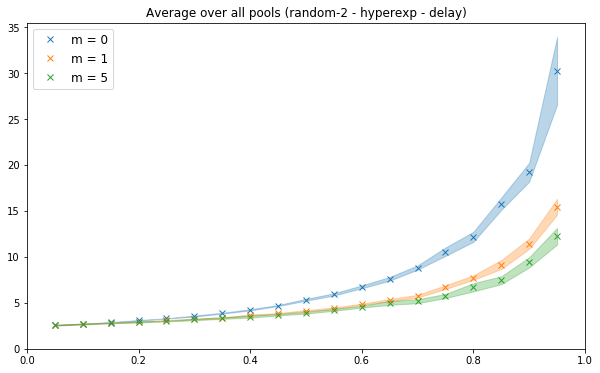

In [21]:
random('random-2', 'hyperexp', 'delay')

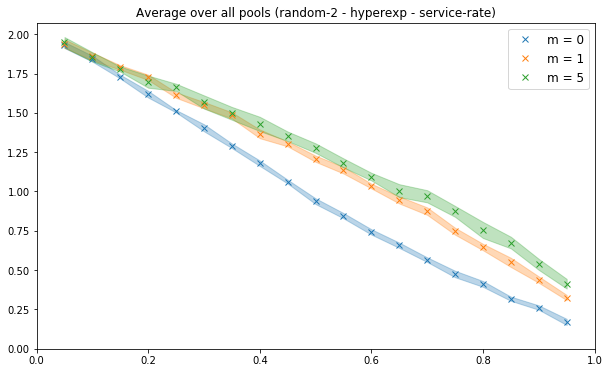

In [22]:
random('random-2', 'hyperexp', 'service-rate')

### Degree three

#### Bimodal number of exponentially-distributed phases

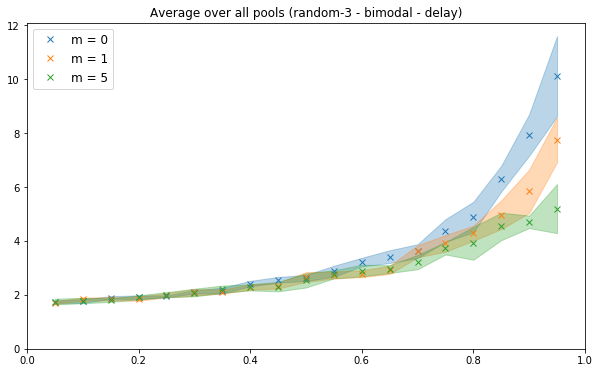

In [23]:
random('random-3', 'bimodal', 'delay')

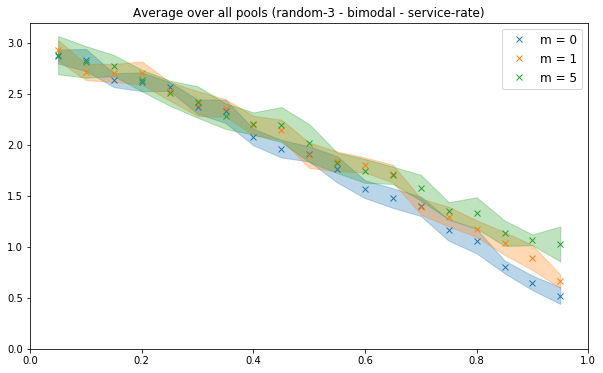

In [24]:
random('random-3', 'bimodal', 'service-rate')

#### Hyperexponential

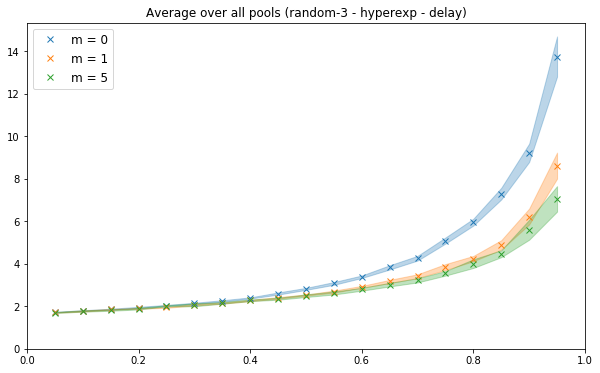

In [25]:
random('random-3', 'hyperexp', 'delay')

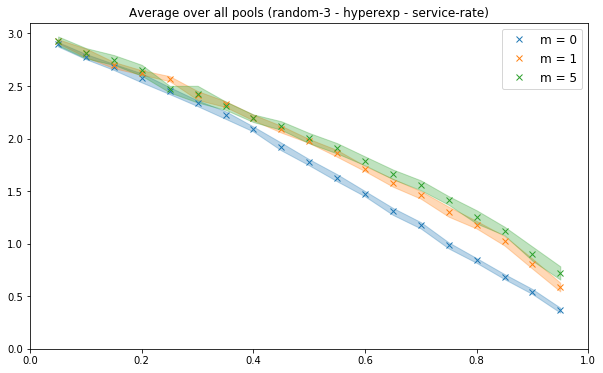

In [26]:
random('random-3', 'hyperexp', 'service-rate')